In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

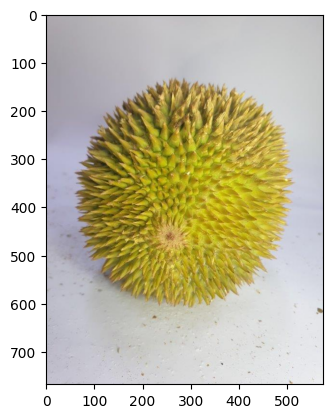

In [136]:
image_name = '20200817_114139.jpg'
no_cont_img = cv2.imread(image_name)
no_cont_img = cv2.cvtColor(no_cont_img, cv2.COLOR_BGR2RGB)
# Read the image
image = cv2.imread(image_name)

# Convert BGR to RGB
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
no_cont_img = img.copy()
plt.imshow(img)

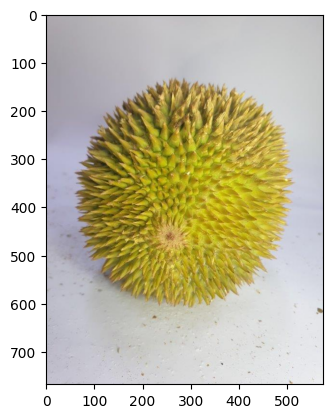

In [137]:
plt.imshow(img)
# plt.imshow(edges)

In [138]:
higher_val = 250
lower_val = 130
lower = np.array([lower_val,lower_val,lower_val])
higher = np.array([higher_val, higher_val, higher_val])

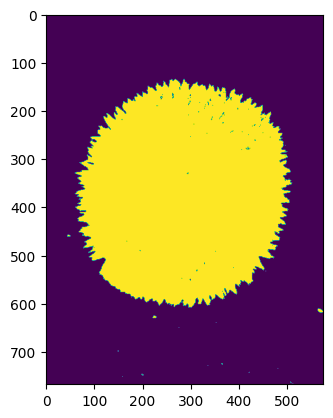

In [139]:
mask = cv2.inRange(img, lower, higher)
mask = cv2.bitwise_not(mask)
plt.imshow(mask)

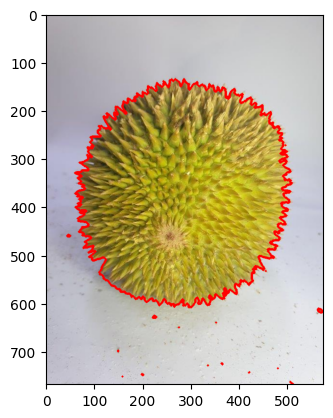

In [140]:
cont,_= cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cont_img = cv2.drawContours(img,cont,-1,(255, 0, 0),3)
plt.imshow(cont_img)

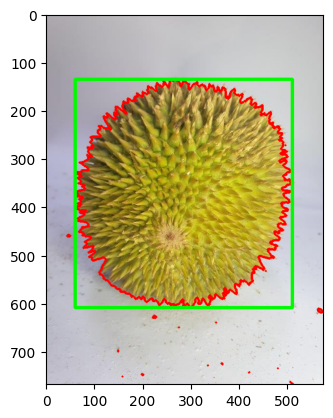

In [141]:
c = max(cont, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)
cv2.rectangle(img,(x,y), (x+w, y+h), (0,250,0), 5)
plt.imshow(img)

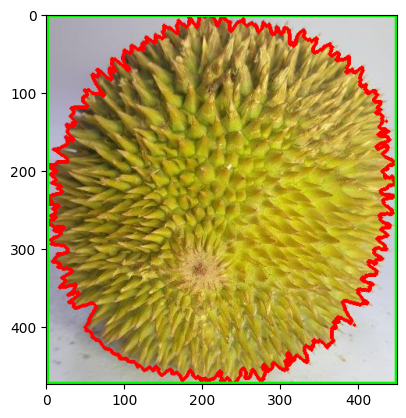

In [142]:
cropped_image = img[y:y+h, x:x+w]
plt.imshow(cropped_image)
plt.show()

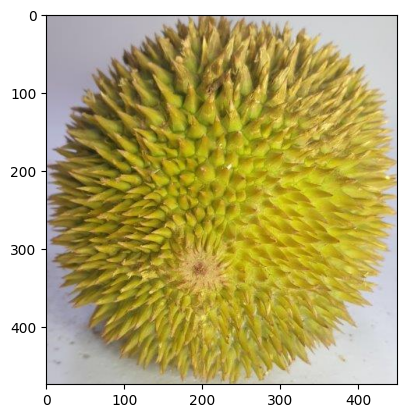

In [143]:
# Cropping the image of durian that has no contour and green rectangle, in order to save it for the dataset
cropped_noCont = no_cont_img[y:y+h, x:x+w]
plt.imshow(cropped_noCont)

In [144]:
# Create the directory if it doesn't exist
output_directory = 'cropped/'
os.makedirs(output_directory, exist_ok=True)

# # Convert from BGR to RGB color space
cropped_noCont = cv2.cvtColor(cropped_noCont, cv2.COLOR_BGR2RGB)

# Save the cropped image using OpenCV
output_path = os.path.join(output_directory, image_name)
success = cv2.imwrite(output_path, cropped_noCont)

# Check if the image was saved successfully
print(success)

True
